In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

Some necessary libraries are imported.

In [2]:
def f(x):
    first_elm = np.dot(np.dot(x, Q), x)
    second_elm = np.dot(b, x)
    f_x = first_elm + second_elm + c
    return f_x

Objective function has been defined in order to use the scipy.optimize later.

In [3]:
global Q
global b
global c

Q = np.loadtxt("Q.txt")
b = np.loadtxt("b.txt")
c = np.loadtxt("c.txt")

The matrices defining the objective function have been inputted as global variables.

In [9]:
print(b.size)
n = b.size
err_tol = 1e-5
alpha = 1
# recommended sigma [10^-5, 10^-1]
sigma = 1e-1
# recommended beta [1/10, 1/2]
beta = 0.4
x = np.random.uniform(-1e4, 1e4, n)
gradient = np.add(np.dot(2, np.dot(Q, x)), b)

alpha_arr = np.array([])
f_x_arr = np.array([])
x_arr = np.array([])

5


Initial guess is created and initial gradient is calculated.

0.06400000000000002
[-0.05708123  0.68024703 -0.0796436  -0.93631147 -0.16706706]
0.6922831525384057


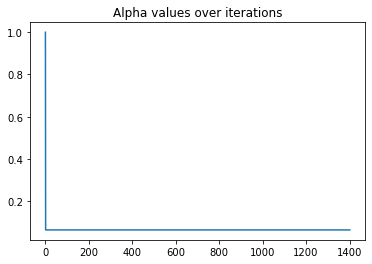

In [10]:
while np.linalg.norm(gradient) >= err_tol:
    # Calculation of f(x_k)
    first_elm = np.dot(np.dot(x, Q), x)
    second_elm = np.dot(b, x)
    f_x = first_elm + second_elm + c
    
    alpha_arr = np.append(alpha_arr, alpha)
    f_x_arr = np.append(f_x_arr, f_x)
    x_arr = np.append(x_arr, x)

    # Calculation of f(x_k - alpha*gradient(f(x)))
    x_ = np.subtract(x, alpha*gradient)
    first_elm_ = np.dot(np.dot(x_, Q), x_)
    second_elm_ = np.dot(b, x_)
    f_x_ = first_elm_ + second_elm_ + c


    # Armijo's rule for selecting step size
    while f_x_ > (f_x -  alpha*sigma*np.linalg.norm(gradient)*np.linalg.norm(gradient)):
        alpha = alpha*beta

        # Calculation of f(x_k - alpha*gradient(f(x)))
        x_ = np.subtract(x, alpha * gradient)
        first_elm_ = np.dot(np.dot(x_, Q), x_)
        second_elm_ = np.dot(b, x_)
        f_x_ = first_elm_ + second_elm_ + c

        
    # x and gradient are updated    
    x = x_
    gradient = np.add(np.dot(2, np.dot(Q, x)), b)

    
print(alpha)    
print(x)
print(f_x)


plt.plot(alpha_arr)
plt.title("Alpha values over iterations")
plt.show()

plt.plot(f_x_arr)
plt.title("Function values over iterations")
plt.show()


In [8]:
# matrix inversion
x_min = np.dot(np.linalg.inv(Q), -b/2)
print(x_min)
print(f(x_min))

[-0.05704387  0.68023741 -0.07965977 -0.93629827 -0.16708381]
0.692283152298834


In [10]:
# scipy optimization
x0 = np.random.uniform(-1e5, 1e5, n)
minimum = optimize.fmin(f, x0)
print(minimum)

Optimization terminated successfully.
         Current function value: 0.692283
         Iterations: 467
         Function evaluations: 765
[-0.05709283  0.68023614 -0.07964932 -0.93628897 -0.16705926]
